In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
main_df = pd.read_csv('/content/drive/MyDrive/Dataset/garments_worker_productivity.csv')

# EDA

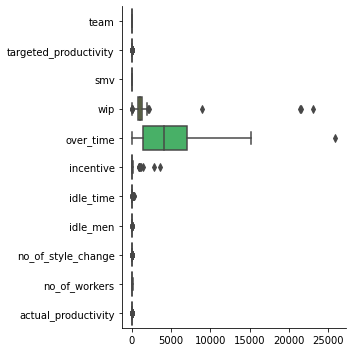

In [ ]:
sns.catplot(kind='box', data=main_df, orient='h')
# to understand spread of data

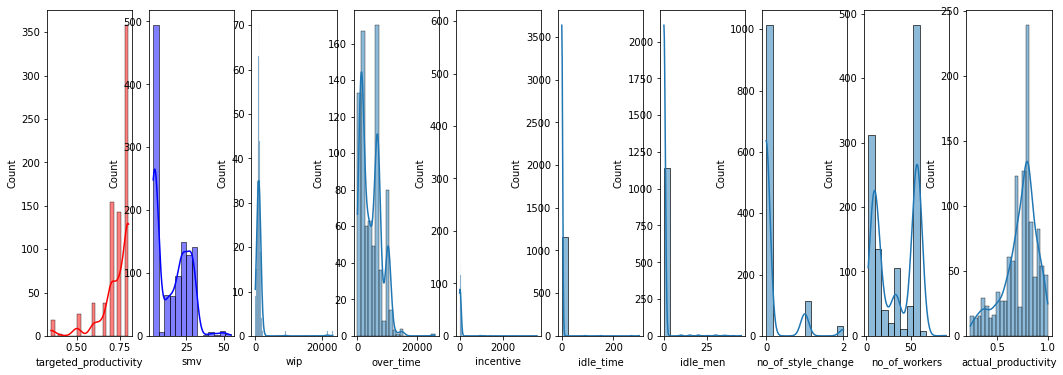

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(18, 6))
sns.histplot(main_df, ax=axes[0], x="targeted_productivity", kde=True, color='r')
sns.histplot(main_df, ax=axes[1], x="smv", kde=True, color='b')
sns.histplot(main_df, ax=axes[2], x="wip", kde=True)
sns.histplot(main_df, ax=axes[3], x="over_time", kde=True)
sns.histplot(main_df, ax=axes[4], x="incentive", kde=True)
sns.histplot(main_df, ax=axes[5], x="idle_time", kde=True)
sns.histplot(main_df, ax=axes[6], x="idle_men", kde=True)
sns.histplot(main_df, ax=axes[7], x="no_of_style_change", kde=True)
sns.histplot(main_df, ax=axes[8], x="no_of_workers", kde=True)
sns.histplot(main_df, ax=axes[9], x="actual_productivity", kde=True)
# to understand how numerical data is distributed

Text(0.5, 1.0, 'productivity per quarter')

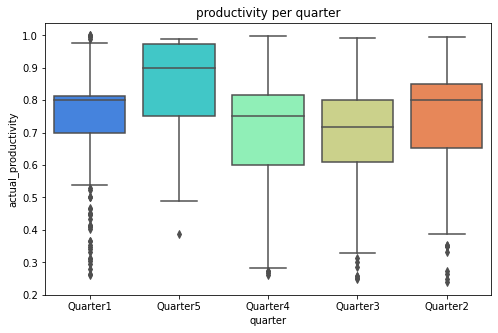

In [ ]:

plt.figure(figsize=(8,5))
sns.boxplot(x='quarter',y='actual_productivity',data=main_df, palette='rainbow')
plt.title("productivity per quarter")
# to understand how quarter affects productivity

Text(0.5, 1.0, 'productivity per day')

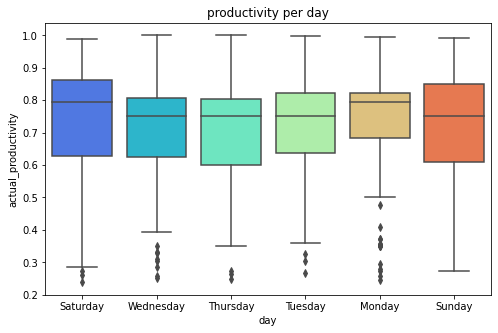

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='day',y='actual_productivity',data=main_df, palette='rainbow')
plt.title("productivity per day")
# to understand how quarter affects productivity

Text(0.5, 1.0, 'Violin plot for productivity per quarter')

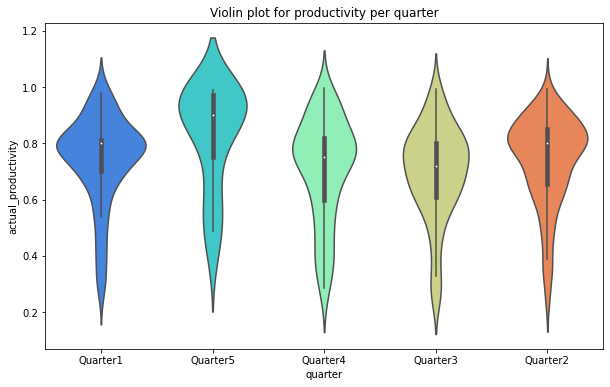

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x='quarter',y="actual_productivity",data=main_df, palette='rainbow')
plt.title("Violin plot for productivity per quarter")
# to understand how categorical data like quarter affects productivity

# Pre processing

In [ ]:
main_df.isna().sum()

quarter                  353
department                 0
day                      375
team                       0
targeted_productivity    384
smv                        0
wip                      703
over_time                371
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

### Removing extra spaces from department

In [ ]:
main_df["department"].value_counts()

sweing        666
finishing     253
finishing     241
Name: department, dtype: int64

In [ ]:
main_df["department"] = main_df["department"].str.strip()

In [ ]:
main_df["department"].value_counts()

sweing       666
finishing    494
Name: department, dtype: int64

### fiiling NaN for quarter

In [ ]:
main_df["quarter"].isna().sum()

353

In [ ]:
main_df["quarter"].value_counts()

Quarter1    254
Quarter2    221
Quarter4    175
Quarter3    128
Quarter5     29
Name: quarter, dtype: int64

In [ ]:
main_df["quarter"].fillna("Quarter6", inplace=True)

### day

In [ ]:
main_df["day"].value_counts()

Monday       137
Tuesday      137
Wednesday    134
Saturday     132
Sunday       125
Thursday     120
Name: day, dtype: int64

In [ ]:
main_df["day"].isna().sum()

375

In [ ]:
main_df["day"].fillna("friday", inplace=True)

### targeted_productivity

In [ ]:
main_df["targeted_productivity"].describe()

count    776.000000
mean       0.732668
std        0.094830
min        0.350000
25%        0.700000
50%        0.750000
75%        0.800000
max        0.800000
Name: targeted_productivity, dtype: float64

In [ ]:
main_df["targeted_productivity"].isna().sum()

384

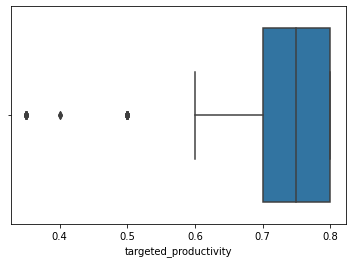

In [ ]:
sns.boxplot(x=main_df["targeted_productivity"])

In [ ]:
# since, majority od data lies between 0.7 and 0.8 and mean 0.732668, median 0.750000
# can replace with either mean or median
main_df["targeted_productivity"].fillna(main_df["targeted_productivity"].median(), inplace=True)

### wip

In [ ]:
main_df["wip"].isna().sum()

703

In [ ]:
main_df["wip"].describe()

count      457.000000
mean      1150.280088
std       1778.931213
min          7.000000
25%        766.000000
50%       1035.000000
75%       1244.000000
max      23122.000000
Name: wip, dtype: float64

In [ ]:
wip_finishing = main_df["wip"][main_df.department == "finishing"]
print(wip_finishing.shape)
print(wip_finishing.isna().sum())
## all wip data with department finishing has NaN

(494,)
494


In [ ]:
main_df.loc[(main_df.department == 'finishing'),'wip']=0
# putting zero in wip where department is finishing

In [ ]:
wip_sweing = main_df["wip"][main_df.department == "sweing"]
wip_sweing.describe()

count      457.000000
mean      1150.280088
std       1778.931213
min          7.000000
25%        766.000000
50%       1035.000000
75%       1244.000000
max      23122.000000
Name: wip, dtype: float64

In [ ]:
main_df["wip"].fillna(wip_sweing.median(), inplace=True)

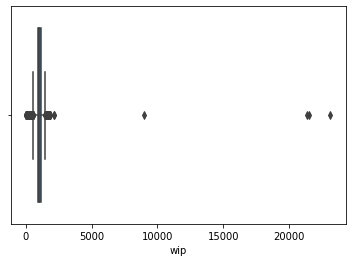

In [ ]:
sns.boxplot(x=main_df["wip"][main_df.department == "sweing"])

### over_time

In [ ]:
main_df["over_time"].describe()

count      789.000000
mean      4612.053232
std       3390.363700
min          0.000000
25%       1440.000000
50%       4080.000000
75%       6960.000000
max      25920.000000
Name: over_time, dtype: float64

In [ ]:
# assuming NaN to be zero
main_df["over_time"].fillna(0, inplace=True)

## correlation

In [ ]:
numerical_columns = main_df.drop(columns=["team", "quarter", "department", "day"])

In [ ]:
numerical_columns.corr()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
targeted_productivity,1.000000,-0.030790,0.013432,-0.009634,0.015192,-0.001471,-0.029580,-0.167422,-0.048297,0.291985
smv,-0.030790,1.000000,0.376049,0.433322,0.023883,0.057695,0.107492,0.320762,0.911423,-0.133491
wip,0.013432,0.376049,1.000000,0.227012,0.029506,-0.000438,0.002077,0.090269,0.426181,0.016470
over_time,-0.009634,0.433322,0.227012,1.000000,-0.009644,0.026112,0.009564,0.069723,0.468040,-0.039759
incentive,0.015192,0.023883,0.029506,-0.009644,1.000000,-0.011624,-0.020351,-0.024087,0.037624,0.068635
idle_time,-0.001471,0.057695,-0.000438,0.026112,-0.011624,1.000000,0.559082,-0.012267,0.059709,-0.081463
idle_men,-0.029580,0.107492,0.002077,0.009564,-0.020351,0.559082,1.000000,0.132653,0.110106,-0.184021
no_of_style_change,-0.167422,0.320762,0.090269,0.069723,-0.024087,-0.012267,0.132653,1.000000,0.338135,-0.198167
no_of_workers,-0.048297,0.911423,0.426181,0.468040,0.037624,0.059709,0.110106,0.338135,1.000000,-0.078635
actual_productivity,0.291985,-0.133491,0.016470,-0.039759,0.068635,-0.081463,-0.184021,-0.198167,-0.078635,1.000000


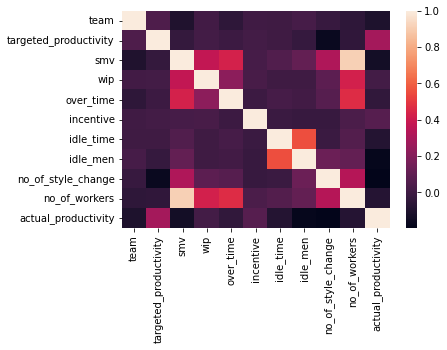

In [ ]:
sns.heatmap(main_df.corr())

## Encoding


In [ ]:
column_names_to_one_hot = ["quarter", "day"]
main_df = pd.get_dummies(main_df, columns=column_names_to_one_hot)

In [ ]:
column_to_label_encode = main_df["department"]
label_encoder = LabelEncoder()
main_df["department"] = label_encoder.fit_transform(column_to_label_encode)

In [ ]:
main_df.head()

,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,quarter_Quarter6,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,day_friday
0,1,8,0.75,23.54,1144.0,0.0,0,0.0,0,0,54.0,0.286985,0,0,0,0,0,1,0,1,0,0,0,0,0
1,1,1,0.80,22.52,1534.0,6780.0,88,0.0,0,0,57.0,0.900136,0,0,0,0,0,1,0,1,0,0,0,0,0
2,0,7,0.80,4.60,0.0,0.0,0,0.0,0,0,8.0,0.342361,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0,5,0.70,4.60,0.0,960.0,0,0.0,0,0,8.0,0.592083,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1,6,0.75,18.79,1035.0,0.0,23,0.0,0,0,33.0,0.600711,0,0,0,0,1,0,0,1,0,0,0,0,0


## Standardize / normalize data


In [ ]:
class DataNormalize:
  def min_max_normalize(self, df, cols):
    for col in cols:
      min = df[col].min()
      max = df[col].max()
      df[col] = (df[col] - min) / (max - min)
    return df

class DataStandardize:
  def standardization(self, df, cols):
    for col in cols:
      mean = df[col].mean()
      std = df[col].std()
      df[col] = (df[col] - mean) / std
    
    return df

In [ ]:
norm = DataNormalize()

In [ ]:
cols = ["targeted_productivity", "smv", "wip", "over_time", "incentive", "idle_time"]

In [ ]:
main_df = norm.min_max_normalize(main_df, cols)

# Train test split


In [ ]:
def train_test_split(main_df, target, SPLIT_SIZE):
  np.random.seed(1)
  X = main_df.to_numpy().astype(np.float64)
  np.random.shuffle(X)
  y = X[:,target]
  X = np.delete(X, target, 1)
  
  train_X = X[0:int(X.shape[0]*SPLIT_SIZE),:]
  train_y = y[0:int(y.shape[0]*SPLIT_SIZE)]
  test_X = X[int(X.shape[0]*SPLIT_SIZE):,:]
  test_y = y[int(y.shape[0]*SPLIT_SIZE):]
  return train_X, test_X, train_y, test_y

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(main_df, 11, 0.8)

# Linear Regression

In [ ]:
class Linear_Regression():
    
    def __init__(self):
        self.w_gd = 0
        self.w_nm = 0
        self.w_ne = 0
        
        self.loss_count_gd_mse = []
        self.loss_count_nm_mse = []
        self.loss_count_cf_mse_mse = 0

        self.loss_count_gd_mae = []
        self.loss_count_nm_mae = []
        self.loss_count_cf_mae = 0
    
    def mean_square_error(self, y, h):
        return 0.5 * ((h-y).T).dot(h-y) / y.shape[0]  
        
    def mean_absolute_error(self, y, h):
        sub = h-y
        mae = 0
        for i in sub:
          mae += abs(i[0])
        
        return mae/y.shape[0]
    
    def fit_gd(self, X, y, itr, lr):
        X = np.hstack([X, np.ones(shape=(X.shape[0], 1))]) # added column of ones it'll help calculating bias term
        y = y.reshape(-1, 1)                                
        self.w_gd = np.zeros(shape=(1, X.shape[1]))        # initial weight assigned as 0
        self.loss_count_gd_mse = []                        
        self.loss_count_gd_mae = []

        for i in range(itr):
            h = X.dot(self.w_gd.T)  #  calculating hypothesis 
            j = self.mean_square_error(y, h)  
            self.loss_count_gd_mse.append(j[0])
            self.loss_count_gd_mae.append(self.mean_absolute_error(y, h))
            self.w_gd -= lr * ((X.T.dot(h-y)).T)  # calculating gd equation
        
        h = X.dot(self.w_gd.T)
        j = self.mean_square_error(y, h)
        j1 = self.mean_absolute_error(y, h)
        self.loss_count_nm_mse.append(j[0])
        print("loss function mean squared error : " + str(j))
        print("loss function mean absolute error : " + str(j1))       
        
    def fit_nm(self, X, y, itr):
        X = np.hstack([X, np.ones(shape=(X.shape[0], 1))]) # added column of ones it'll help calculating bias term
        y = y.reshape(-1, 1)
        self.w_nm = np.zeros(shape=(1, X.shape[1]))        # initial weight assigned as 0
        H_inv = np.linalg.inv(X.T.dot(X))                  # inverse hessian matrix initialization
        self.loss_count_nm_mse = []

        for i in range(itr):
            h = X.dot(self.w_nm.T)
            j = self.mean_square_error(y, h)
            self.loss_count_nm_mse.append(j[0])
            self.loss_count_nm_mae.append(self.mean_absolute_error(y, h))

            self.w_nm -= H_inv.dot(X.T.dot(h-y)).T        # nm calculation
            
        h = X.dot(self.w_nm.T)
        j = self.mean_square_error(y, h)
        j1 = self.mean_absolute_error(y, h)
        self.loss_count_nm_mse.append(j[0])  
        self.loss_count_nm_mae.append(self.mean_absolute_error(y, h))
        print('Loss fn mean squared error value : ' + str(j))      
        print("loss function mean absolute error : " + str(j1))       
       
    def fit_cf(self, X, y):
        X = np.hstack([X, np.ones(shape=(X.shape[0], 1))])
        y = y.reshape(-1, 1)
        
        self.w_ne = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y).T
        
        h = X.dot(self.w_ne.T)
        j = self.mean_square_error(y, h)
        self.loss_count_cf_mse = j[0]
        self.loss_count_cf_mae = self.mean_absolute_error(y, h)
        print('Loss fn mean squared error value : ' + str(j[0]))      
        print('Loss fn mean absolute error value : ' + str(self.loss_count_cf_mae))      
   
    
    def test_gd(self, X, y):
        X = np.hstack([X, np.ones(shape=(X.shape[0], 1))])
        y = y.reshape(-1, 1)
        h = X.dot(self.w_gd.T)
        j = self.mean_square_error(y, h)
        j1 = self.mean_absolute_error(y, h)
        print('Loss fn mean squared error value : ' + str(j))      
        print('Loss fn mean absolute error value : ' + str(j1))      
       
    def test_nm(self, X, y):
        X = np.hstack([X, np.ones(shape=(X.shape[0], 1))])
        y = y.reshape(-1, 1)
        h = X.dot(self.w_nm.T)
        j = self.mean_square_error(y, h)
        j1 = self.mean_absolute_error(y, h)
        print('Loss fn mean squared error value : ' + str(j))      
        print('Loss fn mean absolute error value : ' + str(j1))       
        
    def test_ne(self, X, y):
        X = np.hstack([X, np.ones(shape=(X.shape[0], 1))])
        y = y.reshape(-1, 1)
        h = X.dot(self.w_ne.T)
        j = self.mean_square_error(y, h)
        j1 = self.mean_absolute_error(y, h)
        print('Loss fn mean squared error value : ' + str(j))      
        print('Loss fn mean absolute error value : ' + str(j1))      
        
    def predict_gd(self, X):
        X = np.hstack([X, np.ones(shape=(X.shape[0], 1))])
        h = X.dot(self.w_gd.T)
        return h
    
    def predict_nm(self, X):
        X = np.hstack([X, np.ones(shape=(X.shape[0], 1))])
        h = X.dot(self.w_nm.T)
        return h
    
    def predict_ne(self, X):
        X = np.hstack([X, np.ones(shape=(X.shape[0], 1))])
        h = X.dot(self.w_ne.T)
        return h

# Analysis Linear regression


## for multivariate

In [ ]:
lr = Linear_Regression()

In [ ]:
lr.fit_nm(train_X, train_y, 1000)
print(lr.w_nm)

Loss fn mean squared error value : [[0.01201337]]
loss function mean absolute error : 0.11387367756711504
[[-6.23741330e-02 -4.82865918e-03  2.76224193e-01 -3.39296540e-01
   8.09221503e-02 -4.80750564e-02  1.56053067e-01  1.14539585e-02
  -7.82919694e-03 -4.56624723e-02  4.34067069e-03  1.58958597e+01
   1.58897790e+01  1.58685744e+01  1.58849741e+01  1.59932163e+01
   1.58837117e+01 -1.21496150e+01 -1.21504125e+01 -1.21635086e+01
  -1.21757496e+01 -1.21482680e+01 -1.21544323e+01 -1.21486302e+01
  -3.23780174e+00]]


In [ ]:
print("Testing accuracy")
lr.test_nm(test_X, test_y)
print("Training accuracy")
lr.test_nm(train_X, train_y)

Testing accuracy
Loss fn mean squared error value : [[0.01004012]]
Loss fn mean absolute error value : 0.11076702506485948
Training accuracy
Loss fn mean squared error value : [[0.01201337]]
Loss fn mean absolute error value : 0.11387367756711504


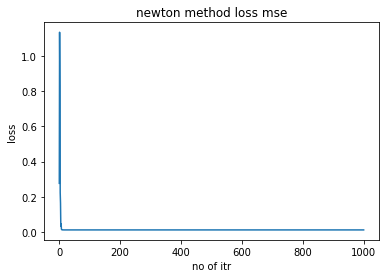

In [ ]:
y_axis = lr.loss_count_nm_mse
y_axis

plt.title("newton method loss mse") 
plt.xlabel("no of itr") 
plt.ylabel("loss") 
plt.plot(list(range(len(y_axis))), y_axis) 
plt.show()

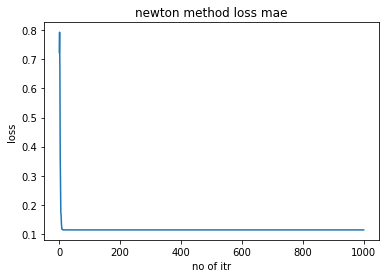

In [ ]:
y_axis = lr.loss_count_nm_mae
y_axis

plt.title("newton method loss mae") 
plt.xlabel("no of itr") 
plt.ylabel("loss")  
plt.plot(list(range(len(y_axis))), y_axis) 
plt.show()

In [ ]:
lr.fit_cf(train_X, train_y)

Loss fn mean squared error value : [1.05949088]
Loss fn mean absolute error value : 0.712849865502199


In [ ]:
lr.fit_gd(train_X, train_y, 10000, 0.000001)

loss function mean squared error : [[0.01283256]]
loss function mean absolute error : 0.11742528590710881


In [ ]:
print("Testing accuracy")
lr.test_gd(test_X, test_y)
print("Training accuracy")
lr.test_gd(train_X, train_y)

Testing accuracy
Loss fn mean squared error value : [[0.01108155]]
Loss fn mean absolute error value : 0.1157965155900566
Training accuracy
Loss fn mean squared error value : [[0.01283256]]
Loss fn mean absolute error value : 0.11742528590710881


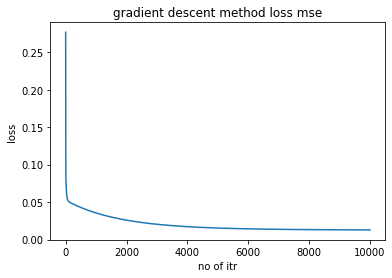

In [ ]:
y_axis = lr.loss_count_gd_mse

plt.title("gradient descent method loss mse") 
plt.xlabel("no of itr") 
plt.ylabel("loss") 
plt.plot(list(range(len(y_axis))), y_axis) 
plt.show()

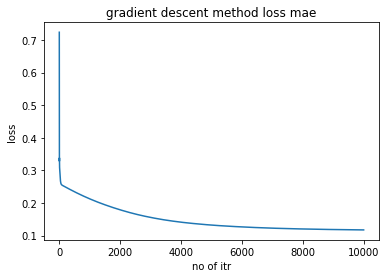

In [ ]:
y_axis = lr.loss_count_gd_mae

plt.title("gradient descent method loss mae") 
plt.xlabel("no of itr") 
plt.ylabel("loss") 
plt.plot(list(range(len(y_axis))), y_axis) 
plt.show()

## for univariate

In [ ]:
df1 = main_df[['targeted_productivity', 'actual_productivity']]

In [ ]:
df1.head()

,targeted_productivity,actual_productivity
0,0.888889,0.286985
1,1.000000,0.900136
2,1.000000,0.342361
3,0.777778,0.592083
4,0.888889,0.600711


In [ ]:
train_uX, test_uX, train_uy, test_uy = train_test_split(main_df, 1, 0.8)

In [ ]:
lr_u = Linear_Regression()

In [ ]:
lr_u.fit_nm(train_uX, train_uy, 50)

Loss fn mean squared error value : [[4.53230853e+37]]
loss function mean absolute error : 3.5331074062345027e+18


In [ ]:
lr_u.fit_gd(train_X, train_uy, 100, 0.00001)

loss function mean squared error : [[1.64176178e+236]]
loss function mean absolute error : 1.5387567999476626e+118
